# Day of the Week Analysis
The objective of this notebook is to answer the following questions:
1. Given the percent change between the closing price and opening price of the day, is there a significant difference between the 7 days of the week? In other words, is price for one day of the week considerably more variable than others?
2. Given that weekends see less trading volume than weekdays, does the price of Bitcoin tend to change more on weekends?
3. I overheard from a prominant crypto trader that Bitcoin's performance on Monday tends to set the tone (bullish or bearish) for the week. Is this true?

In [26]:
# Import dependences
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Create database connection
conn = sqlite3.connect('../db/crypto-analysis.db')
c = conn.cursor()

## Extract Data

In [3]:
# Pull historical price data for Bitcoin
df_btc = pd.read_sql(
    """
    SELECT date, symbol, open, close, volume
    FROM coinbase
    WHERE symbol = 'BTC'
    ORDER BY date DESC
    """, conn
)
print("BTC price data range:")
print(df_btc.iloc[-1]['date'])
print(df_btc.iloc[0]['date'])

BTC price data range:
2015-07-20
2021-09-01


## Create variables

In [4]:
# Get day of the week given the date
day_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_btc['day_of_week'] = df_btc['date'].apply(lambda x: day_names[datetime.strptime(x,'%Y-%m-%d').weekday()])
df_btc.head(10)

,date,symbol,open,close,volume,day_of_week
0,2021-09-01,BTC,47110.33,48624.81,12715.728728,Wednesday
1,2021-08-31,BTC,46996.80,47112.50,12919.439702,Tuesday
2,2021-08-30,BTC,48802.58,46993.71,12249.237415,Monday
3,2021-08-29,BTC,48942.89,48802.58,6935.095110,Sunday
4,2021-08-28,BTC,49081.08,48942.94,4895.701913,Saturday
5,2021-08-27,BTC,46851.47,49077.57,8924.122477,Friday
6,2021-08-26,BTC,48991.57,46851.47,11651.343739,Thursday
7,2021-08-25,BTC,47682.45,48987.33,9289.231771,Wednesday
8,2021-08-24,BTC,49504.53,47682.45,12068.338233,Tuesday
9,2021-08-23,BTC,49284.38,49506.50,10824.268381,Monday


In [5]:
# Get daily percent change
df_btc['pct_chng'] = round(((df_btc['close']-df_btc['open'])/df_btc['open']) * 100,2)
df_btc.head(10)

,date,symbol,open,close,volume,day_of_week,pct_chng
0,2021-09-01,BTC,47110.33,48624.81,12715.728728,Wednesday,3.21
1,2021-08-31,BTC,46996.80,47112.50,12919.439702,Tuesday,0.25
2,2021-08-30,BTC,48802.58,46993.71,12249.237415,Monday,-3.71
3,2021-08-29,BTC,48942.89,48802.58,6935.095110,Sunday,-0.29
4,2021-08-28,BTC,49081.08,48942.94,4895.701913,Saturday,-0.28
5,2021-08-27,BTC,46851.47,49077.57,8924.122477,Friday,4.75
6,2021-08-26,BTC,48991.57,46851.47,11651.343739,Thursday,-4.37
7,2021-08-25,BTC,47682.45,48987.33,9289.231771,Wednesday,2.74
8,2021-08-24,BTC,49504.53,47682.45,12068.338233,Tuesday,-3.68
9,2021-08-23,BTC,49284.38,49506.50,10824.268381,Monday,0.45


In [6]:
# Create weekday/weekend classification
def get_day_group(day):
    '''
    Given a day of the week, output whether it is a weekday or weekend day.
    '''

    if day in ['Saturday','Sunday']:
        return 'weekend'
    else:
        return 'weekday'

df_btc = df_btc.copy()
df_btc['day_grp'] = df_btc['day_of_week'].apply(lambda x: get_day_group(x))
df_btc.head()

,date,symbol,open,close,volume,day_of_week,pct_chng,day_grp
0,2021-09-01,BTC,47110.33,48624.81,12715.728728,Wednesday,3.21,weekday
1,2021-08-31,BTC,46996.80,47112.50,12919.439702,Tuesday,0.25,weekday
2,2021-08-30,BTC,48802.58,46993.71,12249.237415,Monday,-3.71,weekday
3,2021-08-29,BTC,48942.89,48802.58,6935.095110,Sunday,-0.29,weekend
4,2021-08-28,BTC,49081.08,48942.94,4895.701913,Saturday,-0.28,weekend


## Clean Data
Need to check for outliers that could skew results

In [7]:
df_btc.sort_values('pct_chng', ascending=False).head()

,date,symbol,open,close,volume,day_of_week,pct_chng,day_grp
1500,2017-07-20,BTC,2258.99,2873.48,36509.305874,Thursday,27.20,weekday
1360,2017-12-07,BTC,14090.00,17390.01,84528.102371,Thursday,23.42,weekday
1361,2017-12-06,BTC,11718.34,14090.00,51358.745929,Wednesday,20.24,weekday
205,2021-02-08,BTC,38871.43,46448.10,47934.010388,Monday,19.49,weekday
881,2019-04-02,BTC,4137.01,4901.93,38406.932116,Tuesday,18.49,weekday


In [8]:
df_btc.sort_values('pct_chng', ascending=True).head()

,date,symbol,open,close,volume,day_of_week,pct_chng,day_grp
537,2020-03-12,BTC,7938.05,4857.10,113902.203329,Thursday,-38.81,weekday
2050,2016-01-15,BTC,430.04,357.53,28641.673586,Friday,-16.86,weekday
1444,2017-09-14,BTC,3855.61,3250.40,36363.925012,Thursday,-15.70,weekday
1300,2018-02-05,BTC,8167.90,6905.19,59578.698221,Monday,-15.46,weekday
1014,2018-11-19,BTC,5560.00,4733.50,41591.922304,Monday,-14.87,weekday


In [9]:
# Remove outliers
df_btc_clean = df_btc[abs(df_btc['pct_chng']) <=25] # 25% should be a good cutoff
df_btc_clean.sort_values('pct_chng', ascending=False).head()

,date,symbol,open,close,volume,day_of_week,pct_chng,day_grp
1360,2017-12-07,BTC,14090.00,17390.01,84528.102371,Thursday,23.42,weekday
1361,2017-12-06,BTC,11718.34,14090.00,51358.745929,Wednesday,20.24,weekday
205,2021-02-08,BTC,38871.43,46448.10,47934.010388,Monday,19.49,weekday
881,2019-04-02,BTC,4137.01,4901.93,38406.932116,Tuesday,18.49,weekday
1503,2017-07-17,BTC,1911.79,2235.19,21436.764537,Monday,16.92,weekday


## Graph Data

### Boxplots

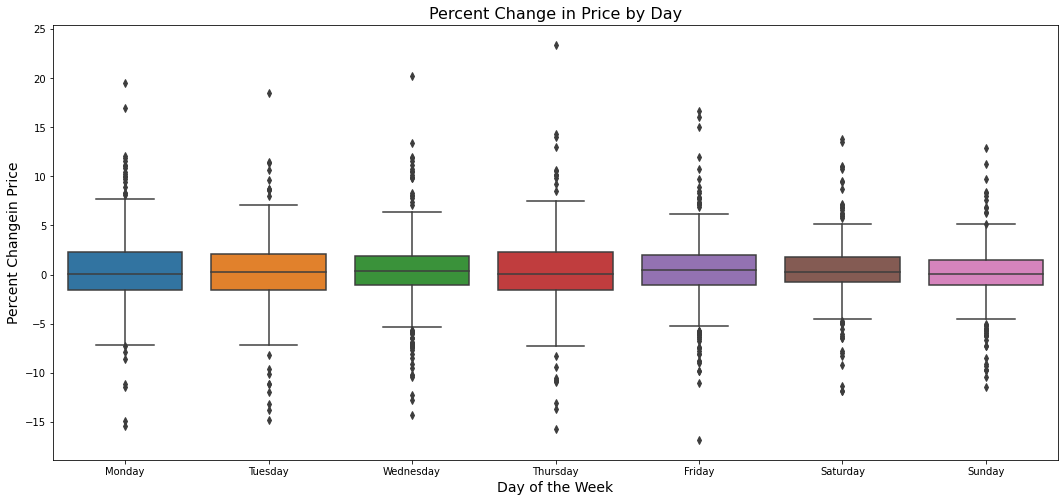

In [10]:
fig, ax = plt.subplots(figsize=(18,8))

boxplot = sns.boxplot(
    x="day_of_week", 
    y='pct_chng', 
    data=df_btc_clean,
    order=day_names,
)

boxplot.axes.set_title("Percent Change in Price by Day", fontsize=16)
boxplot.set_xlabel("Day of the Week", fontsize=14)
boxplot.set_ylabel("Percent Changein Price", fontsize=14)

plt.show()

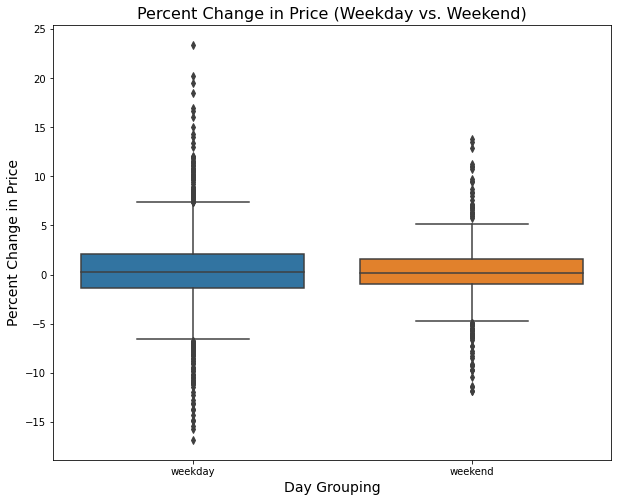

In [11]:
fig, ax = plt.subplots(figsize=(10,8))

boxplot = sns.boxplot(
    x="day_grp", 
    y='pct_chng', 
    data=df_btc_clean,
)

boxplot.axes.set_title("Percent Change in Price (Weekday vs. Weekend)", fontsize=16)
boxplot.set_xlabel("Day Grouping", fontsize=14)
boxplot.set_ylabel("Percent Change in Price", fontsize=14)

plt.show()

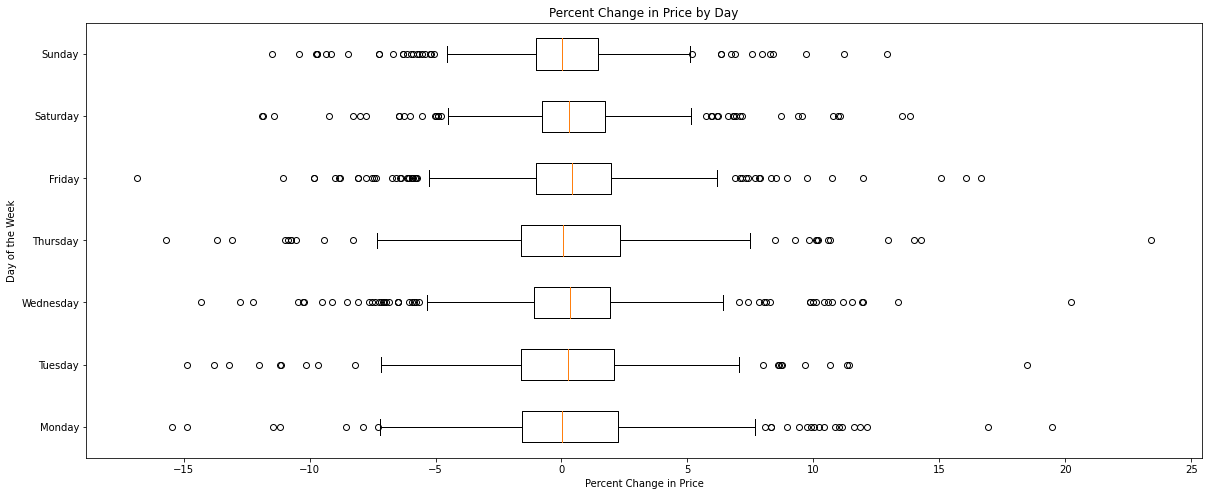

In [12]:
# Using matplotlib
fig, ax = plt.subplots(figsize=(20,8))

plots = [
    df_btc_clean[df_btc_clean['day_of_week'] == 'Monday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Tuesday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Wednesday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Thursday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Friday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Saturday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Sunday']['pct_chng']
]
ax.boxplot(plots, vert=False, labels=day_names)

ax.set_title('Percent Change in Price by Day')
ax.set_xlabel('Percent Change in Price')
ax.set_ylabel('Day of the Week')

plt.show()

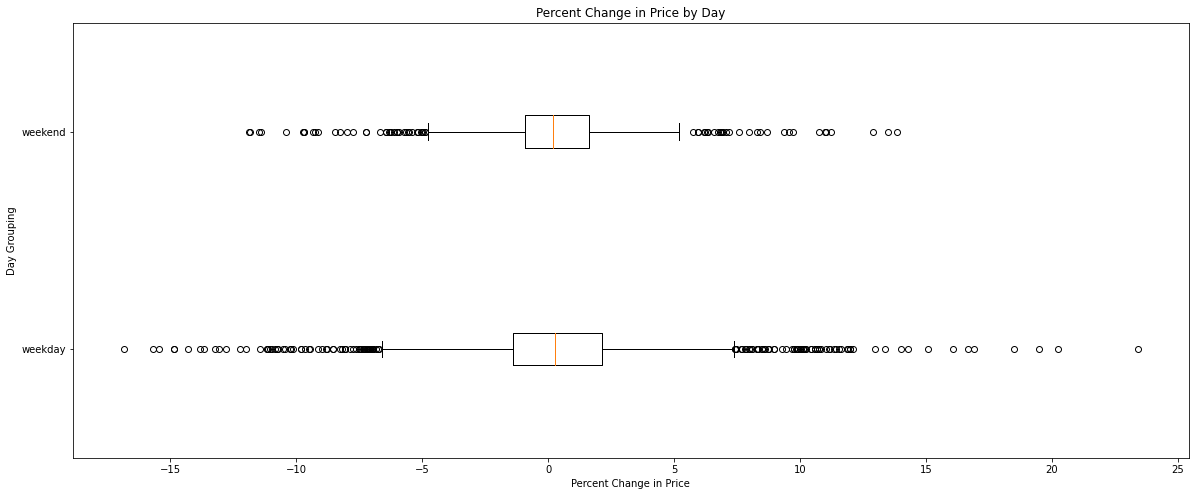

In [13]:
# Using matplotlib
fig, ax = plt.subplots(figsize=(20,8))

plots = [
    df_btc_clean[df_btc_clean['day_grp'] == 'weekday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_grp'] == 'weekend']['pct_chng'],
]
ax.boxplot(plots, vert=False, labels=['weekday','weekend'])

ax.set_title('Percent Change in Price by Day')
ax.set_xlabel('Percent Change in Price')
ax.set_ylabel('Day Grouping')

plt.show()

### Histograms

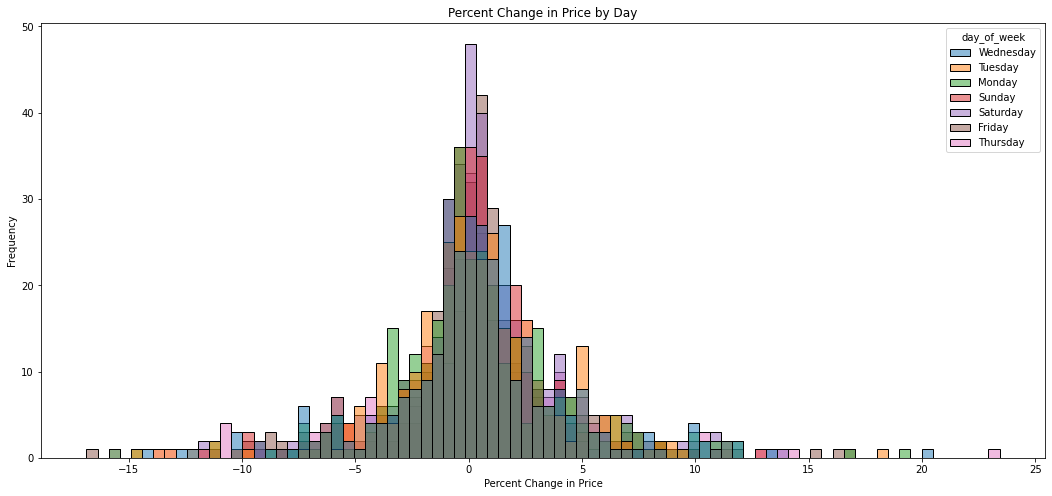

In [14]:
fig, ax = plt.subplots(figsize=(18,8))

sns.histplot(
    data=df_btc_clean, 
    x="pct_chng", 
    hue="day_of_week",
    # element="step"
    # multiple="stack"
)

ax.set_title('Percent Change in Price by Day')
ax.set_xlabel('Percent Change in Price')
ax.set_ylabel('Frequency')

plt.show()

## Monday Weekly Analysis
Idea: Does the price performance on Mondays set the tone for the price performance of the entire week? Do larger price decreases on Mondays give a stronger signal that price performance of the week will be bearsish?

Based on the universally agreed upon decision that the weekly open price of Bitcoin is the price at 00:00 GMT Monday, that is what we will consider as the weekly open and the weekly close will be the closing price Sunday.

In [15]:
df_btc_clean.head(14)

,date,symbol,open,close,volume,day_of_week,pct_chng,day_grp
0,2021-09-01,BTC,47110.33,48624.81,12715.728728,Wednesday,3.21,weekday
1,2021-08-31,BTC,46996.80,47112.50,12919.439702,Tuesday,0.25,weekday
2,2021-08-30,BTC,48802.58,46993.71,12249.237415,Monday,-3.71,weekday
3,2021-08-29,BTC,48942.89,48802.58,6935.095110,Sunday,-0.29,weekend
4,2021-08-28,BTC,49081.08,48942.94,4895.701913,Saturday,-0.28,weekend
5,2021-08-27,BTC,46851.47,49077.57,8924.122477,Friday,4.75,weekday
6,2021-08-26,BTC,48991.57,46851.47,11651.343739,Thursday,-4.37,weekday
7,2021-08-25,BTC,47682.45,48987.33,9289.231771,Wednesday,2.74,weekday
8,2021-08-24,BTC,49504.53,47682.45,12068.338233,Tuesday,-3.68,weekday
9,2021-08-23,BTC,49284.38,49506.50,10824.268381,Monday,0.45,weekday


In [16]:
df_btc_sun_mon = df_btc_clean[(df_btc_clean['day_of_week'] == 'Monday') | (df_btc_clean['day_of_week'] == 'Sunday')]

In [17]:

df_btc_sun_mon = df_btc_sun_mon.copy()
df_btc_sun_mon['date'] = pd.to_datetime(df_btc_sun_mon['date'])
df_btc_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227 entries, 0 to 2228
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2227 non-null   object 
 1   symbol       2227 non-null   object 
 2   open         2227 non-null   float64
 3   close        2227 non-null   float64
 4   volume       2227 non-null   float64
 5   day_of_week  2227 non-null   object 
 6   pct_chng     2227 non-null   float64
 7   day_grp      2227 non-null   object 
dtypes: float64(4), object(4)
memory usage: 221.1+ KB


In [18]:
df_btc_sun_mon['week_id'] = df_btc_sun_mon['date'].dt.isocalendar().week
df_btc_sun_mon['year_id'] = df_btc_sun_mon['date'].dt.isocalendar().year

In [19]:
df_btc_sun_mon.head(10)

,date,symbol,open,close,volume,day_of_week,pct_chng,day_grp,week_id,year_id
2,2021-08-30,BTC,48802.58,46993.71,12249.237415,Monday,-3.71,weekday,35,2021
3,2021-08-29,BTC,48942.89,48802.58,6935.095110,Sunday,-0.29,weekend,34,2021
9,2021-08-23,BTC,49284.38,49506.50,10824.268381,Monday,0.45,weekday,34,2021
10,2021-08-22,BTC,48870.21,49284.63,6243.396434,Sunday,0.85,weekend,33,2021
16,2021-08-16,BTC,47014.38,45902.46,10467.660315,Monday,-2.37,weekday,33,2021
17,2021-08-15,BTC,47109.64,47014.49,7745.702008,Sunday,-0.20,weekend,32,2021
23,2021-08-09,BTC,43829.15,46285.48,19464.724935,Monday,5.60,weekday,32,2021
24,2021-08-08,BTC,44628.11,43829.14,18712.271582,Sunday,-1.79,weekend,31,2021
30,2021-08-02,BTC,39859.18,39149.59,12379.412165,Monday,-1.78,weekday,31,2021
31,2021-08-01,BTC,41499.00,39865.41,10617.672935,Sunday,-3.94,weekend,30,2021


In [20]:
df_btc_sun_mon['year_week'] =  df_btc_sun_mon['year_id'].astype(str) + '-' + df_btc_sun_mon['week_id'].astype(str)
df_btc_sun_mon.head()

,date,symbol,open,close,volume,day_of_week,pct_chng,day_grp,week_id,year_id,year_week
2,2021-08-30,BTC,48802.58,46993.71,12249.237415,Monday,-3.71,weekday,35,2021,2021-35
3,2021-08-29,BTC,48942.89,48802.58,6935.095110,Sunday,-0.29,weekend,34,2021,2021-34
9,2021-08-23,BTC,49284.38,49506.50,10824.268381,Monday,0.45,weekday,34,2021,2021-34
10,2021-08-22,BTC,48870.21,49284.63,6243.396434,Sunday,0.85,weekend,33,2021,2021-33
16,2021-08-16,BTC,47014.38,45902.46,10467.660315,Monday,-2.37,weekday,33,2021,2021-33


In [22]:
df_btc_sun_mon.drop(2, inplace=True)
df_btc_sun_mon.head()

,date,symbol,open,close,volume,day_of_week,pct_chng,day_grp,week_id,year_id,year_week
3,2021-08-29,BTC,48942.89,48802.58,6935.095110,Sunday,-0.29,weekend,34,2021,2021-34
9,2021-08-23,BTC,49284.38,49506.50,10824.268381,Monday,0.45,weekday,34,2021,2021-34
10,2021-08-22,BTC,48870.21,49284.63,6243.396434,Sunday,0.85,weekend,33,2021,2021-33
16,2021-08-16,BTC,47014.38,45902.46,10467.660315,Monday,-2.37,weekday,33,2021,2021-33
17,2021-08-15,BTC,47109.64,47014.49,7745.702008,Sunday,-0.20,weekend,32,2021,2021-32


In [23]:
# Confirm even number of rows
df_btc_sun_mon.shape

(638, 11)

In [34]:
year_weeks = df_btc_sun_mon['year_week'].unique()

output = {}
start_dates = []
end_dates = []
monday_pct_chngs = []
weekly_pct_chngs = []

for year_week in year_weeks:
    df_subset = df_btc_sun_mon[df_btc_sun_mon['year_week'] == year_week]
    
    weekly_open = df_subset[df_subset['day_of_week'] == 'Monday']['open'].item()
    weekly_close = df_subset[df_subset['day_of_week'] == 'Sunday']['close'].item()

    weekly_pct_chng = round(((weekly_close - weekly_open)/weekly_open) * 100,2)

    monday_pct_chngs.append(df_subset[df_subset['day_of_week'] == 'Monday']['pct_chng'].item())
    weekly_pct_chngs.append(weekly_pct_chng)
    start_dates.append(df_subset[df_subset['day_of_week'] == 'Monday']['date'].item())
    end_dates.append(df_subset[df_subset['day_of_week'] == 'Sunday']['date'].item())

output = {
    'start_date':start_dates,
    'end_date':end_dates,
    'mon_pct_chng':monday_pct_chngs,
    'week_pct_chng':weekly_pct_chngs
}

df_weekly_perf = pd.DataFrame(output)
df_weekly_perf.head()
    

,start_date,end_date,mon_pct_chng,week_pct_chng
0,2021-08-23,2021-08-29,0.45,-0.98
1,2021-08-16,2021-08-22,-2.37,4.83
2,2021-08-09,2021-08-15,5.60,7.27
3,2021-08-02,2021-08-08,-1.78,9.96
4,2021-07-26,2021-08-01,5.18,12.52


In [35]:
# Create flag to see if both Monday and weekly have the same sign
# Determine if Mondays "set the trend"

df_weekly_perf['same_trend'] = np.sign(df_weekly_perf['mon_pct_chng']) == np.sign(df_weekly_perf['week_pct_chng'])

# if np.sign(df_weekly_perf['mon_pct_chng']) == np.sign(df_weekly_perf['week_pct_chng']):
#     df_weekly_perf['same_trend'] = 1
# else:
#     df_weekly_perf['same_trend'] = 0

df_weekly_perf.head()


,start_date,end_date,mon_pct_chng,week_pct_chng,same_trend
0,2021-08-23,2021-08-29,0.45,-0.98,False
1,2021-08-16,2021-08-22,-2.37,4.83,False
2,2021-08-09,2021-08-15,5.60,7.27,True
3,2021-08-02,2021-08-08,-1.78,9.96,False
4,2021-07-26,2021-08-01,5.18,12.52,True


In [36]:
df_weekly_perf['same_trend'].mean()

0.64576802507837

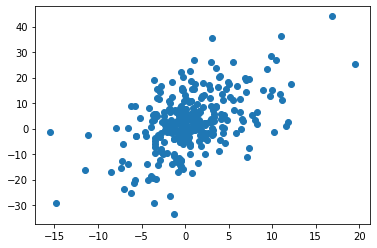

In [37]:
plt.scatter(df_weekly_perf['mon_pct_chng'], df_weekly_perf['week_pct_chng'])
plt.show()

In [38]:
# Split data into bull markets and bear markets and see if there is stronger correlation
df_weekly_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   start_date     319 non-null    datetime64[ns]
 1   end_date       319 non-null    datetime64[ns]
 2   mon_pct_chng   319 non-null    float64       
 3   week_pct_chng  319 non-null    float64       
 4   same_trend     319 non-null    bool          
dtypes: bool(1), datetime64[ns](2), float64(2)
memory usage: 10.4 KB


In [47]:
df_weekly_perf_2017_bull = df_weekly_perf[(df_weekly_perf['start_date'] >= '01-01-2017') & (df_weekly_perf['end_date'] < '01-01-2018')]
df_weekly_perf_2017_bull.tail()


,start_date,end_date,mon_pct_chng,week_pct_chng,same_trend
238,2017-01-30,2017-02-05,0.73,10.88,True
239,2017-01-23,2017-01-29,-2.02,-1.39,True
240,2017-01-16,2017-01-22,0.12,11.73,True
241,2017-01-09,2017-01-15,-2.10,-9.62,True
242,2017-01-02,2017-01-08,1.86,-7.01,False


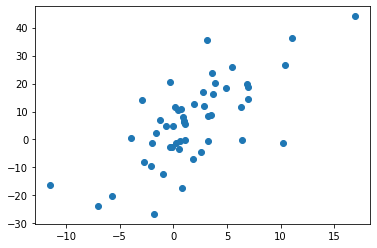

0.6730769230769231


In [48]:
plt.scatter(df_weekly_perf_2017_bull['mon_pct_chng'], df_weekly_perf_2017_bull['week_pct_chng'])
plt.show()

print(df_weekly_perf_2017_bull['same_trend'].mean())

In [51]:
df_weekly_perf_2018_bear = df_weekly_perf[(df_weekly_perf['start_date'] >= '01-01-2018') & (df_weekly_perf['end_date'] < '01-01-2019')]
df_weekly_perf_2018_bear.tail()


,start_date,end_date,mon_pct_chng,week_pct_chng,same_trend
186,2018-01-29,2018-02-04,-3.58,-29.20,True
187,2018-01-22,2018-01-28,-6.52,0.15,False
188,2018-01-15,2018-01-21,-0.48,-15.66,True
189,2018-01-08,2018-01-14,-7.30,-15.57,True
190,2018-01-01,2018-01-07,-2.76,16.67,False


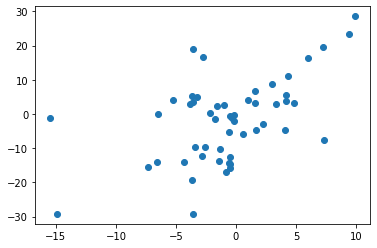

0.6923076923076923


In [52]:
plt.scatter(df_weekly_perf_2018_bear['mon_pct_chng'], df_weekly_perf_2018_bear['week_pct_chng'])
plt.show()

print(df_weekly_perf_2018_bear['same_trend'].mean())

### Seasonality Analysis

In [56]:
df_weekly_perf_q1 = df_weekly_perf[(df_weekly_perf['start_date'].dt.month >= 1) & (df_weekly_perf['end_date'].dt.month < 4)]
df_weekly_perf_q2 = df_weekly_perf[(df_weekly_perf['start_date'].dt.month >= 4) & (df_weekly_perf['end_date'].dt.month < 7)]
df_weekly_perf_q3 = df_weekly_perf[(df_weekly_perf['start_date'].dt.month >= 7) & (df_weekly_perf['end_date'].dt.month < 10)]
df_weekly_perf_q4 = df_weekly_perf[(df_weekly_perf['start_date'].dt.month >= 10)]



In [47]:
df_weekly_perf_2017_bull = df_weekly_perf[(df_weekly_perf['start_date'] >= '01-01-2017') & (df_weekly_perf['end_date'] < '01-01-2018')]
df_weekly_perf_2017_bull.tail()


,start_date,end_date,mon_pct_chng,week_pct_chng,same_trend
238,2017-01-30,2017-02-05,0.73,10.88,True
239,2017-01-23,2017-01-29,-2.02,-1.39,True
240,2017-01-16,2017-01-22,0.12,11.73,True
241,2017-01-09,2017-01-15,-2.10,-9.62,True
242,2017-01-02,2017-01-08,1.86,-7.01,False


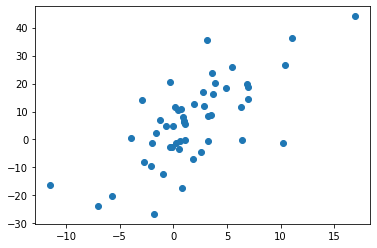

0.6730769230769231


In [48]:
plt.scatter(df_weekly_perf_2017_bull['mon_pct_chng'], df_weekly_perf_2017_bull['week_pct_chng'])
plt.show()

print(df_weekly_perf_2017_bull['same_trend'].mean())

AttributeError: 'list' object has no attribute 'xaxis'

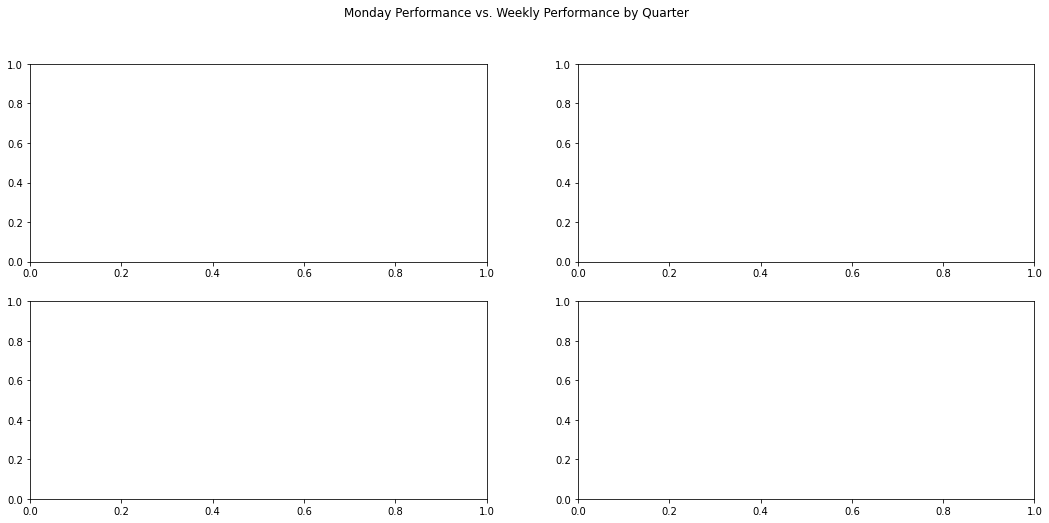

In [61]:
fig, axs = plt.subplots(2, 2, figsize=(18,8))
fig.suptitle('Monday Performance vs. Weekly Performance by Quarter')

sns.scatterplot(ax=[0,0], x=df_weekly_perf_q1["mon_pct_chng"], y=df_weekly_perf_q1["week_pct_chng"])
sns.scatterplot(ax=[0,1], x="mon_pct_chng", y="week_pct_chng", data=df_weekly_perf_q2)
sns.scatterplot(ax=[1,0], x="mon_pct_chng", y="week_pct_chng", data=df_weekly_perf_q3)
sns.scatterplot(ax=[1,1], x="mon_pct_chng", y="week_pct_chng", data=df_weekly_perf_q4)

plt.show()

In [69]:
# create a list conditions
conditions = [
    ((df_weekly_perf['end_date'].dt.month >= 1) & (df_weekly_perf['end_date'].dt.month < 4)),
    ((df_weekly_perf['end_date'].dt.month >= 4) & (df_weekly_perf['end_date'].dt.month < 7)),
    ((df_weekly_perf['end_date'].dt.month >= 7) & (df_weekly_perf['end_date'].dt.month < 10)),
    (df_weekly_perf['end_date'].dt.month >= 10)
]

# create a list of the values we want to assign for each condition
values = ['q1', 'q2', 'q3', 'q4']

# create a new column and use np.select to assign values to it using our lists as arguments
df_weekly_perf['quarter'] = np.select(conditions, values)

# display updated DataFrame
df_weekly_perf.tail()

,start_date,end_date,mon_pct_chng,week_pct_chng,same_trend,quarter
314,2015-08-17,2015-08-23,-0.73,-11.57,True,q3
315,2015-08-10,2015-08-16,-0.92,-3.14,True,q3
316,2015-08-03,2015-08-09,-0.59,-5.30,True,q3
317,2015-07-27,2015-08-02,0.11,-3.83,False,q3
318,2015-07-20,2015-07-26,0.73,5.72,True,q3


AttributeError: 'PathCollection' object has no property 'order'

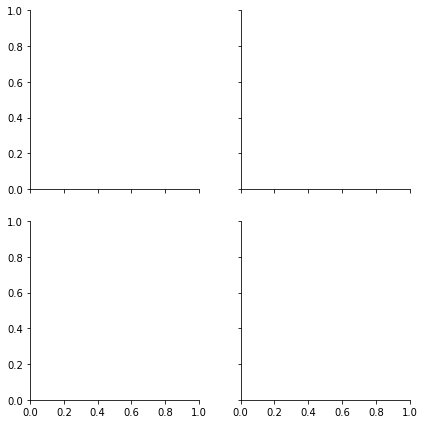

In [74]:
g = sns.FacetGrid(df_weekly_perf, col="quarter", col_wrap=2)
g.map(sns.scatterplot, "mon_pct_chng", "week_pct_chng", alpha=.7)
g.add_legend()